In [101]:
# Importing necessary libraries for data handling, processing, visualization, and machine learning.

import pandas as pd  # Pandas is used for loading and managing tabular datasets (like CSV files).
import numpy as np  # NumPy is used for numerical operations and handling arrays/matrices.
import matplotlib.pyplot as plt  # Matplotlib is used for creating plots and visualizing data.

# Scikit-learn imports for machine learning utilities.
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets.
from sklearn.metrics import mean_squared_error  # Evaluates model performance using Mean Squared Error.

# TensorFlow is the core library used to build and train regression models (both linear and neural networks).
import tensorflow as tf  

# Print TensorFlow version to confirm installation and check for compatibility.
print(tf.__version__)


2.18.0


# Regression with TensorFlow

We'll use the car MPG dataset from http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data to start

It's space separated and no headings so this is how to read it in

In [102]:
# Define column names for the dataset as it doesn't have a header row in the file.
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

# Read the dataset from a space-separated file.
df = pd.read_csv("auto-mpg.data", names=column_names,  # Use the custom column names.
                          na_values='?',  # Treat '?' as missing values (NaN).
                          comment='\t',  # Ignore lines starting with a tab (used for comments in the file).
                          sep=' ',  # Data is space-separated.
                          skipinitialspace=True)  # Skip extra spaces between values if present.

df.head()
                 

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


Want to build a linear regression model, to predict MPG from HorsePower, ignoring the rest

$y_{mpg} = \alpha + \beta * x_{horsepower}$

But have to clean df

In [103]:
# Check for missing values in the dataset.
df.isna().sum()


MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [104]:
# Drop rows with missing values from the dataframe.
df = df.dropna()
# check result
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Going to split the dataset into a set to FIT the model and to EVALUATE the model. Train/test sets

Could do this with sklearn

In [105]:
# Splitting the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(df["Horsepower"], df["MPG"],
                                                    random_state=2, train_size=0.8)


In [106]:
X_train

202     95.0
184     92.0
3      150.0
176     90.0
261    120.0
       ...  
301     70.0
22      95.0
73     130.0
15      95.0
170     78.0
Name: Horsepower, Length: 313, dtype: float64

### What is Normalization?

Normalization is a preprocessing step that transforms data so that all features have a consistent scale. This helps ensure that no single feature dominates the learning process due to its larger numeric range.

One common normalization technique is **Standardization**, which adjusts the data such that:
- The mean (`μ`) of each feature becomes `0`.
- The standard deviation (`σ`) becomes `1`.

This is often achieved using tools like **StandardScaler** from scikit-learn, which is applied to the data manually before feeding it into a model.

### Normalization in Keras Models

Keras provides a more integrated and efficient way to normalize data directly within your machine learning model. Instead of preprocessing the data manually beforehand, Keras offers the `Normalization` layer. This layer simplifies the workflow by embedding the normalization process into the model pipeline.

### How Does the `Normalization` Layer Work?

1. **Create the Normalization Layer**:  `horsepower_normalizer = Normalization(input_shape=[1,])`
   The layer is instantiated as part of the model. 
2. **Adapt the Layer to the Data**: `horsepower_normalizer.adapt(X_train.values.reshape(-1, 1))`
   The `.adapt()` method is called on the layer, which calculates the mean and standard deviation of the dataset. These statistics are then stored and used for normalizing the data during both training and inference.
3. **Seamless Integration**:  
   Once added to the model, this layer automatically preprocesses the input data, ensuring consistency during training and when making predictions.

---

### Why Use Keras Normalization?

- **Simplifies Workflow**: 
  There's no need to handle normalization as a separate preprocessing step. It’s all part of the model.

- **Consistency**: 
  Normalization is applied during both training and inference, ensuring that the model receives data in the same scale.

- **Portability**: 
  Models become more self-contained and easier to deploy since the preprocessing is embedded.


In [107]:
# Importing the Normalization layer from TensorFlow
# Note: The preprocessing module is deprecated; we now use Normalization instead.
from tensorflow.keras.layers import Normalization
# Step 1: Initialize the normalization layer
# The input_shape specifies that the input will be a single feature (e.g., "Horsepower").
horsepower_normalizer = Normalization(input_shape=[1,])
# Step 2: Adapt the normalization layer to the training data
# The adapt() method calculates the mean and variance of the data (here, X_train) to scale it.
# Reshape ensures the data is in the correct format (a 2D array where each row is a data point).
horsepower_normalizer.adapt(X_train.values.reshape(-1, 1))
# Step 3: Print the normalization layer details
# This confirms that the layer has been built and is ready to normalize the data.
print(horsepower_normalizer)

<Normalization name=normalization_7, built=True>


c:\Users\norbe\anaconda3\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The output means that a Normalization layer (`name=normalization_7`) has been initialized, adapted (mean and variance calculated), and is ready (`built=True`) to process input data.

In [ ]:
# check training values
X_train.values

array([ 95.,  92., 150.,  90., 120., 115., 110.,  88., 110.,  60.,  68.,
       208.,  90., 105.,  52.,  65., 150., 225., 110., 165.,  66.,  88.,
       170.,  83.,  65., 100.,  97.,  58., 110.,  95., 103.,  88.,  65.,
       112.,  88.,  97.,  63., 170., 107.,  67., 125.,  71., 110., 198.,
        96.,  74.,  96.,  78.,  65., 105., 100.,  91.,  62.,  67.,  95.,
        86.,  68., 150., 160., 139.,  52.,  88., 130., 100.,  67.,  67.,
       180.,  86.,  90., 150., 100., 158.,  65.,  75., 113.,  75., 165.,
        71., 153.,  85.,  84.,  60., 140., 170.,  67.,  90.,  95., 150.,
       149.,  75.,  72.,  83., 220.,  98.,  71., 150.,  95.,  80.,  72.,
       150., 110.,  88., 137., 153.,  95., 102., 120.,  88.,  70., 100.,
        78.,  72.,  65., 167., 180., 170., 100., 150., 116., 105.,  75.,
        48., 110.,  90., 140.,  67., 215.,  46., 105., 198.,  71.,  75.,
        86.,  68., 145., 230.,  68., 115.,  75., 150.,  75.,  67.,  83.,
        67.,  68., 150.,  67., 150.,  84.,  63., 12

In [128]:
# Print the normalized values of the training data (Horsepower).
# The horsepower_normalizer scales the data using the mean and variance calculated during .adapt().
# .numpy() converts the output tensor to a NumPy array for easier readability.
print('Normalized:', horsepower_normalizer(X_train.values).numpy())


Normalized: [[-0.24380238 -0.32220325  1.1935467  -0.37447047  0.4095381   0.27887
   0.1482019  -0.42673773  0.1482019  -1.158479   -0.9494101   2.7092965
  -0.37447047  0.0175338  -1.367548   -1.0278109   1.1935467   3.153568
   0.1482019   1.5855509  -1.0016773  -0.42673773  1.716219   -0.5574058
  -1.0278109  -0.11313429 -0.19153515 -1.2107463   0.1482019  -0.24380238
  -0.03473344 -0.42673773 -1.0278109   0.20046914 -0.42673773 -0.19153515
  -1.0800781   1.716219    0.06980104 -0.9755437   0.5402062  -0.87100923
   0.1482019   2.4479604  -0.21766876 -0.7926084  -0.21766876 -0.6880739
  -1.0278109   0.0175338  -0.11313429 -0.34833685 -1.1062118  -0.9755437
  -0.24380238 -0.47900495 -0.9494101   1.1935467   1.4548829   0.90607685
  -1.367548   -0.42673773  0.67087424 -0.11313429 -0.9755437  -0.9755437
   1.9775552  -0.47900495 -0.37447047  1.1935467  -0.11313429  1.4026155
  -1.0278109  -0.7664747   0.22660275 -0.7664747   1.5855509  -0.87100923
   1.2719475  -0.5051386  -0.5312722 

## Model 1: Linear Regression with TensorFlow
Now let's actually build the model. We will use Sequential, first layer to Normalise the data and second layer to actually do the $y=mx+c $

In [129]:
# Define a simple sequential model in TensorFlow.
# The model consists of two layers:
# 1. The normalization layer (horsepower_normalizer) ensures the input data is normalized.
# 2. A Dense layer with a single neuron (units=1), which performs linear regression.
model = tf.keras.Sequential([
    horsepower_normalizer,  # First layer: Normalization
    tf.keras.layers.Dense(1)  # Second layer: Dense layer for regression
])

# Print a summary of the model architecture to verify the structure.
# Displays the number of layers, output shapes, and parameters in the model.
model.summary()

'''# Alternative way to define the same model:
# Create an empty Sequential model and add layers one by one.
model = tf.keras.Sequential()  # Initialize the Sequential model
model.add(horsepower_normalizer)  # Add the normalization layer
model.add(tf.keras.layers.Dense(1))  # Add the Dense layer
model.summary()  # Print the model summary'''

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_7 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

'# Alternative way to define the same model:\n# Create an empty Sequential model and add layers one by one.\nmodel = tf.keras.Sequential()  # Initialize the Sequential model\nmodel.add(horsepower_normalizer)  # Add the normalization layer\nmodel.add(tf.keras.layers.Dense(1))  # Add the Dense layer\nmodel.summary()  # Print the model summary'

### Explanation of Output

- **Model: "sequential_6"**:
  - Indicates the name of the model (automatically assigned by TensorFlow).
  - This is the sixth model created in this session.

#### Layers:
1. **Normalization Layer (`normalization_7`)**:
   - **Type**: Normalization
   - **Output Shape**: `(None, 1)`
     - `None`: Flexible batch size.
     - `1`: Number of input features (e.g., `Horsepower`).
   - **Param #**: `3`
     - Non-trainable parameters (mean and variance) computed during `.adapt()`.

2. **Dense Layer (`dense_12`)**:
   - **Type**: Dense
   - **Output Shape**: `(None, 1)`
     - Single output value for regression.
   - **Param #**: `2`
     - Trainable parameters:
       - **Weights**: 1 (connecting input to output neuron).
       - **Bias**: 1 (added to the neuron's output).
#### Parameter Totals:
- **Total params**: `5`
  - `3` from the normalization layer (non-trainable).
  - `2` from the dense layer (trainable).
- **Trainable params**: `2`
  - Parameters adjusted during training (weights and bias in the Dense layer).
- **Non-trainable params**: `3`
  - Fixed parameters (mean and variance from the normalization layer).

#### Memory Units:
- **Total size**: `24.00 B`
  - **Trainable**: `8.00 B` (2 parameters).
  - **Non-trainable**: `16.00 B` (3 parameters).


#### REF: <a href="https://keras.io/api/layers/">Keras Different Types of Layers</a>

The number of inputs can either be set by the input_shape argument, or automatically when the model is run for the first time.

Dense is the layer type that will allow Linear Regression

### Compile and fit the model

In [ ]:
# Compile the model with the optimizer and loss function.
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),  # Adam optimizer with a learning rate of 0.1.
    loss='mean_squared_error'  # Loss function: Mean Squared Error, used for regression tasks.
)
# Train the model using the training data.
history = model.fit(
    X_train, y_train,  # Training data: features (X_train) and target labels (y_train).
    epochs=500,  # Number of training iterations (epochs).
    verbose=0  # Suppresses output during training. Set to 1 for progress updates.
)


Next, view the history of the training process over all epochs

In [ ]:
# Convert the training history into a pandas DataFrame for easy analysis.
# `history.history` contains the loss values for each epoch during training.
hist = pd.DataFrame(history.history)
# Add the epoch numbers as a column to the DataFrame for better clarity.
hist['epoch'] = history.epoch
# Print the first few rows of the training history to check the initial training progress.
print(hist.head())
# Print the last few rows to observe how the model's performance evolved over the epochs.
print(hist.tail())


         loss  epoch
0  605.970337      0
1  551.191101      1
2  498.961273      2
3  451.794128      3
4  408.827606      4
          loss  epoch
495  24.379288    495
496  24.370615    496
497  24.344141    497
498  24.350254    498
499  24.348532    499


Evaluate the model on the test set

In [134]:
# Evaluate the model's performance on the test data.
# `model.evaluate` computes the loss function (mean squared error here) on the test dataset.
# `X_test`: Features from the test set.
# `y_test`: True target values (MPG) for the test set.
tfLinearRegressionEval = model.evaluate(X_test, y_test)

# Print the evaluation result.
# The loss represents how well the model predicts the test data (lower is better).
# `round` formats the loss to 4 decimal places for readability.
print("TensorFlow Linear Regression Loss: ", round(tfLinearRegressionEval, 4))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 25.3005
TensorFlow Linear Regression Loss:  22.5649


Output explanation:
- 3/3: Evaluated over 3 batches of test data.
- 10ms/step: Time per batch.
- loss: 25.3005: MSE (Mean Square Error) during evaluation.
- **22.5649**: Final MSE (rounded). *Indicates the model’s prediction error on the test set. Lower is better.*

Below is a function to plot the progress of the training

In [114]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    try:
        plt.plot(history.history['val_loss'], label='val_loss')
    except:
        None
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

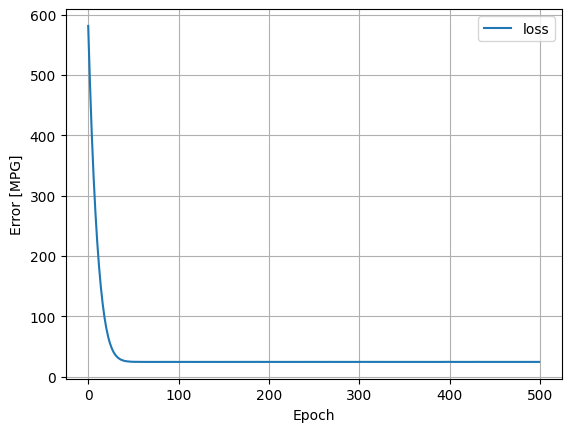

In [115]:
plot_loss(history)

### Visualise the TensorFlow Linear Regression model
Let's visualise the model. I've written a function below that will plot the original data and the predicted values

In [116]:
def plot_horsepower(x, y):
  plt.scatter(X_train, y_train, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

Let's view the model

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


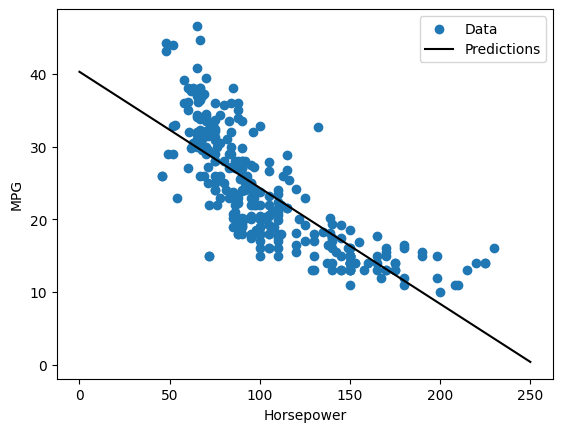

In [117]:
x = np.linspace(0.0, 250, 251)
y_pred = model.predict(x)
plot_horsepower(x,y_pred)

## Model 2: Linear Regression with sklearn
Let's try to fit a model with SKLearn's Linear Regression

In [135]:
# Import the LinearRegression class from scikit-learn
from sklearn.linear_model import LinearRegression

# Initialize a Linear Regression model
# This uses Ordinary Least Squares (OLS) to fit a line to the data.
model_sk = LinearRegression()

# Train the model using the training data (fit the model).
# X_train.values.reshape(-1, 1): Reshapes the training features to a 2D array (required by scikit-learn).
# y_train.values: The target values (MPG) for the training set.
model_sk.fit(X_train.values.reshape(-1, 1), y_train.values)

# Use the trained model to predict values for the test set.
# X_test.values.reshape(-1, 1): The test features, reshaped into the required 2D format.
yPredSK = model_sk.predict(X_test.values.reshape(-1, 1))


In [137]:
# Print the coefficient of the Linear Regression model.
# `model_sk.coef_` gives the slope of the fitted line, showing how much `MPG` changes per unit change in `Horsepower`.
print(model_sk.coef_)

# Print the intercept of the Linear Regression model.
# `model_sk.intercept_` gives the y-intercept of the line, i.e., the predicted `MPG` when `Horsepower` is 0.
print(model_sk.intercept_)

# Evaluate the performance of the scikit-learn Linear Regression model using Mean Squared Error (MSE).
# `y_test`: True `MPG` values for the test set.
# `yPredSK`: Predicted `MPG` values from the model.
sklearnLinearRegressionEval = mean_squared_error(y_test, yPredSK)

# Print the MSE for the scikit-learn model, rounded to 4 decimal places.
print("sklearn Linear Regression Loss: ", round(sklearnLinearRegressionEval, 4))


[-0.16007745]
40.31638714059319
sklearn Linear Regression Loss:  22.57


Let's visualise  the SKLearn model

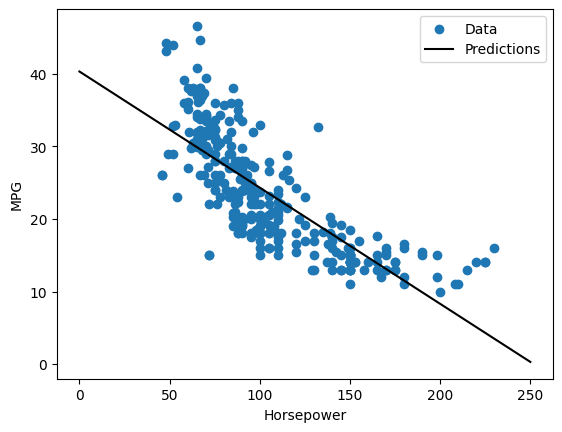

In [120]:
x = np.linspace(0.0, 250, 251)
y_pred = model_sk.predict(x.reshape(-1,1))
plot_horsepower(x,y_pred)

## Model 3: Regression with TensorFlow Neural Network

Now using a TensorFlow Neural Network

Going to go with two hidden layers with 64 units each
The output layer will only have 1 unit (as it is a regression problem)

In [139]:
# Define a neural network model using TensorFlow's Sequential API.
modelNN = tf.keras.Sequential([
    # Step 1: Input Normalization
    # The horsepower_normalizer ensures the input feature is normalized before feeding it to the model.
    horsepower_normalizer,
    
    # Step 2: First Hidden Layer
    # A Dense layer with 64 neurons and ReLU (Rectified Linear Unit) activation function.
    # ReLU introduces non-linearity and allows the network to learn complex patterns.
    tf.keras.layers.Dense(64, activation='relu'),
    
    # Step 3: Second Hidden Layer
    # Another Dense layer with 64 neurons and ReLU activation for deeper feature extraction.
    tf.keras.layers.Dense(64, activation='relu'),
    
    # Step 4: Output Layer
    # A Dense layer with 1 neuron (linear activation by default), producing a single numeric output (e.g., predicted MPG).
    tf.keras.layers.Dense(1)
])

# Print a summary of the neural network architecture.
# Displays the number of layers, output shapes, and total trainable parameters in the model.
modelNN.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_7 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,356 (17.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 3 (16.00 B)

- Normalization Layer: Scales input (3 non-trainable params).
  - A layer that scales input data to a consistent range by normalizing it (mean = 0, standard deviation = 1).
- Dense Layers: Two hidden layers (64 neurons each) and one output layer:
  - A fully connected layer in a neural network where every neuron in the layer is connected to every neuron in the previous layer.
- Params: 128 (1st), 4,160 (2nd), 65 (output).
- Total Params: 4,356 (4,353 trainable, 3 non-trainable).

In [141]:
# Compile the neural network model before training.
modelNN.compile(
    loss='mean_squared_error',  # Loss function: Mean Squared Error (MSE), suitable for regression tasks.
    optimizer=tf.keras.optimizers.Adam(0.001)  # Adam optimizer with a learning rate of 0.001 for efficient learning.
)


This time I've decided to use a validation set to evaluate the system at each epoch

Note that validation_split=0.2 takes the last 20% of the training data to be validation data, if I hadn't shuffled my data previously (using train_test_split) then I would need to now

In [142]:
# Train the neural network model using the training data.
historyNN = modelNN.fit(
    X_train, y_train,  # Training features (X_train) and target values (y_train).
    
    validation_split=0.2,  # Use 20% of the training data for validation to monitor the model's performance.
    
    epochs=100  # Train for 100 complete passes through the training dataset.
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 604.1847 - val_loss: 579.8971
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 574.2147 - val_loss: 568.1817
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 577.2293 - val_loss: 553.9053
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 556.7796 - val_loss: 535.8249
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 579.6324 - val_loss: 511.7114
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 533.2461 - val_loss: 480.4832
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 511.6889 - val_loss: 442.0182
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 431.7604 - val_loss: 397.2612
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 421.5840 - val_loss: 346.2011
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 368.9148 - val_loss: 291.3472
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 319.9829 - val_loss: 234.6416
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━

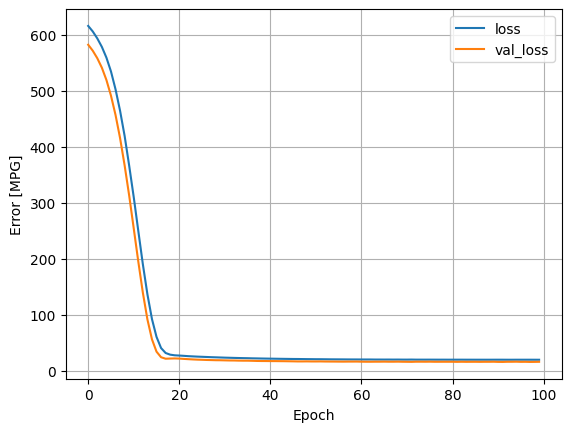

In [124]:
plot_loss(historyNN)

Again, let's visualise the ANN model

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


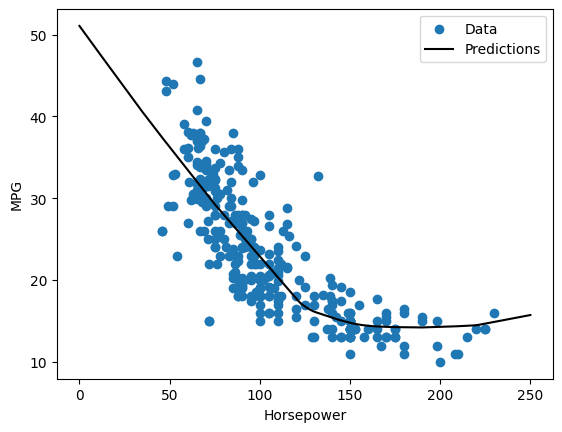

In [146]:
x = tf.linspace(0.0, 250, 251)
y = modelNN.predict(x)
plot_horsepower(x,y)

Notice the different shape

In [147]:
# Evaluate the trained neural network model on the test data.
# `modelNN.evaluate` calculates the loss (mean squared error in this case) on the test set.
# X_test: Test features.
# y_test: True target values for the test set.
tfNNEval = modelNN.evaluate(X_test, y_test)

# Print the evaluation result.
# This shows how well the model performs on unseen data (lower loss is better).
# `round` formats the loss value to 4 decimal places for easier readability.
print("TensorFlow Neural Network Loss: ", round(tfNNEval, 4))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.1594
TensorFlow Neural Network Loss:  18.5284


In [127]:
print("Model 1: TensorFlow Linear Regression Loss: ", round(tfLinearRegressionEval,4))
print("Model 2: sklearn Linear Regression Loss: ", round(sklearnLinearRegressionEval,4))
print("Model 3: TensorFlow Linear Regression Loss: ", round(tfNNEval,4))

Model 1: TensorFlow Linear Regression Loss:  22.5996
Model 2: sklearn Linear Regression Loss:  22.57
Model 3: TensorFlow Linear Regression Loss:  18.363


The ANN (Artificial Neural Network) gave the best score! The non-linear NN model better captured the underlying trend